{1: [2], 2: [2, 3, 4], 3: [1, 2, 5], 4: [5, 6], 5: [3, 4], 6: [4]}


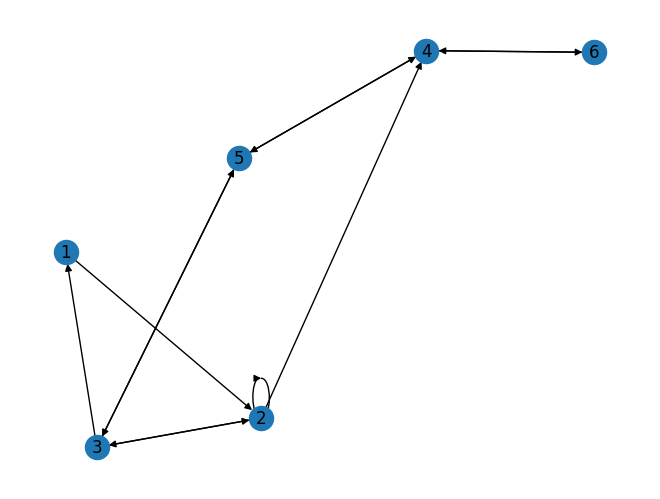

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
        #1   2   3   4   5   6
Adj =  [[0 , 1 , 0 , 0 , 0 , 0] , # 1
        [0 , 1 , 1 , 1 , 0 , 0] , # 2
        [1 , 1 , 0 , 0 , 1 , 0] , # 3
        [0 , 0 , 0 , 0 , 1 , 1] , # 4
        [0 , 0 , 1 , 1 , 0 , 0] , # 5
        [0 , 0 , 0 , 1 , 0 , 0]]  # 6

# Task 1a1
# Convert to adjacency matrix to adjacency list
# Row --> Column
# Example: 1 --> 2, 2 --> 2/3/4
AdjList = {}
for i in range(len(Adj)):
    AdjList[i+1] = []
    for j in range(len(Adj[i])):
        if Adj[i][j] == 1:
            AdjList[i+1].append(j+1)
print(AdjList)

# Task 1a2
# Draw the graph
G = nx.DiGraph(AdjList)

# Use spring layout
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()


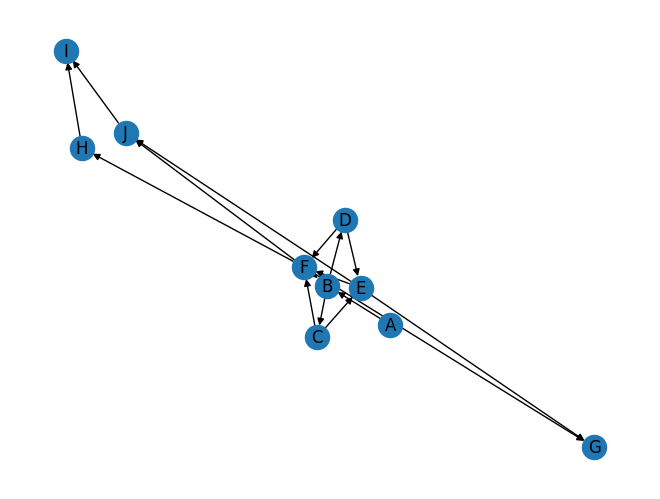

In [41]:
# Task 1a3
# Adjacency list
AdjList = {
    'A': ['B'],
    'B': ['C', 'D'],
    'C': ['E', 'F'],
    'D': ['E', 'F'],
    'E': ['F', 'G', 'J'],
    'F': ['B', 'G', 'H', 'J'],
    'G': [],
    'H': ['I'],
    'I': [],
    'J': ['I']
}
# Draw the graph
G = nx.DiGraph(AdjList)

# Use spring layout
pos = nx.spring_layout(G, scale=3, seed=42)

nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()

In [32]:
# Task 1b
# BFS:
# A --> B --> C --> D --> E --> F --> J --> G --> H -->  --> I 

# It is technically Enqeue source, add to visited, find non-visited neighbours, 
# enqeue neighbours, deqeue source, repeat whole process

# Enqueue A [A]
# Dequeue A, Visited [A], Neighbours = B
# Enqueue B [B]
# Dequeue B, Visited [A,B], Neighbours = C, D
# Enqueue C, D [C, D]
# Dequeue C, Visited [A,B,C], Neighbours = E, F
# Enqueue E,F [D, E, F]
# Dequeue D, Visited [A, B, C , D], Neighbours = E, F (Both already in Queue)
# Dequeue E, Visited [A, B, C, D, E], Neighbours = F, J
# Enqueue G, J [F, G, J]
# Dequeue F, Visited [A, B, C, D, E, F], Neighbours = B, G, H, J
# Enqueue H [G, J, H]
# Dequeue G, Visited [A, B, C, D, E, F, G], No Neighbours
# Dequeue J, Visited [A, B, C, D, E, F, G, J], Neighbours = I
# Enqueue I [H, I]
# Dequeue H, Visited [A, B, C, D, E, F, G, J, H], Neighbours = I
# Dequeue I, Visited [A, B, C, D, E, F, G, J, H, I], No Neighbours
# Empty Queue == Termination of process
# End


# DFS:

# Start Stack [A], Visited []
# Pop A, Add Neighbours (B) to top of stack
# Stack [B], Visited [A]
# Pop B, Add C, D
# Stack [C, D], Visited [A, B]
# Pop C, Add E, F
# Stack [E, F, D], Visited [A, B, C]
# Pop E, Add G, J
# Stack [G, J, F, D], Visited [A, B, C, E] 
# Pop G
# Stack [J, F, D], Visited [A, B, C, E, G] 
# Pop J, Add I
# Stack [I, F, D], Visited [A, B, C, E, G, J] 
# Pop I
# Stack [F, D], Visited [A, B, C, E, G, J, I]
# Pop F, Add H
# Stack [H, D], Visited [A, B, C, E, G, J, I, F]
# Pop H
# Stack [D], Visited [A, B, C, E, G, J, I, F, H]
# Pop D
# Stack [], Visited [A, B, C, E, G, J, I, F, H, D]
# Empty Stack == Termination of process
# End

# Biggest difference between BFS and DFS is that BFS uses a Queue, whilst DFS uses a Stack




In [28]:
# Task 1c
# AdjList will be a DAG if you remove the edge e = (F,B),
# As there is a loop from B -> C -> E -> F -> B

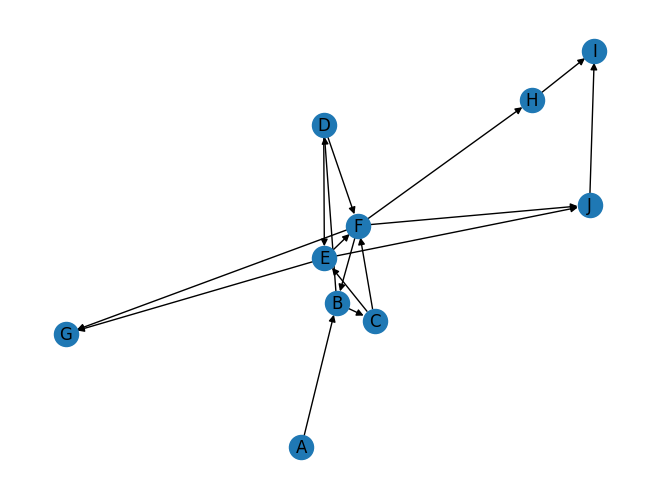

In [44]:
# Task 1d
# Adjacency list
AdjList1d = {
    'A': ['B'],
    'B': ['C', 'D'],
    'C': ['A','E', 'F'],
    'D': ['E', 'F'],
    'E': ['F', 'J'],
    'F': ['B', 'G', 'H', 'J'],
    'G': [],
    'H': ['I'],
    'I': ['C'],
    'J': ['I']
}
# Draw the graph
G = nx.DiGraph(AdjList)

# Use spring layout
pos = nx.spring_layout(G, scale=4, seed=2)

nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()

# Convert AdjList1d into a DAG, where A is root node



{'A': ['B'], 'B': ['C', 'D'], 'C': ['E'], 'D': [], 'E': ['F'], 'F': ['G', 'H', 'J'], 'G': [], 'H': ['I'], 'I': [], 'J': []}


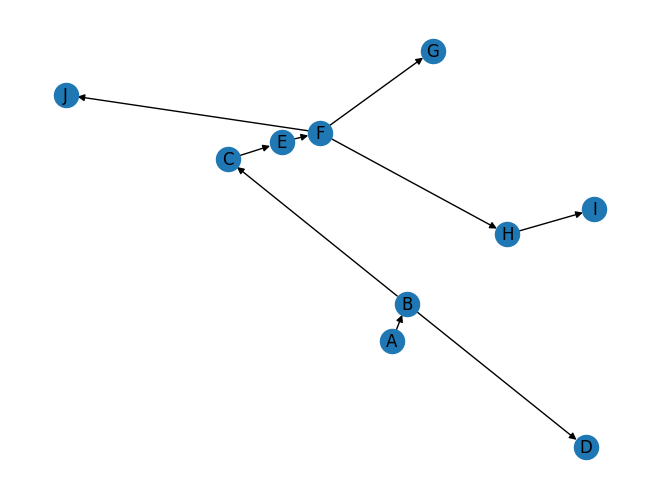

In [52]:
# Convert AdjList1d into a DAG, where A is root node
def convert_to_DAG(AdjList1d, root):
    visited = set()
    DAG = {node: [] for node in AdjList1d}

    def dfs(node):
        visited.add(node)
        for neighbor in AdjList1d[node]:
            if neighbor not in visited:
                DAG[node].append(neighbor)
                dfs(neighbor)

    dfs(root)
    return DAG

DAG = convert_to_DAG(AdjList1d, 'A')
print(DAG)

# Draw the graph
G = nx.DiGraph(DAG)

# Use spring layout
pos = nx.spring_layout(G, scale=4, seed=24)

nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()

